In [1]:
import torch
from bokeh.colors.groups import yellow
from torch import nn #nn contains all of Pytorch's building for neural networks
import matplotlib.pyplot as plt

## Linear Regression

In [2]:
weight = 0.7
bias = 0.3
# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

## Create a train/test data

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [4]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.scatter(train_data, train_labels, c='r', label='Training data')
    plt.scatter(test_data, test_labels, label='Testing data')
    
    if predictions is not None:
        plt.scatter(X_test, predictions, c='y', label='Prediction values')
    plt.legend()

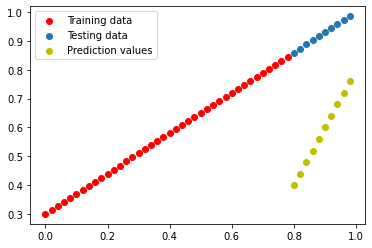

In [5]:
plot_predictions(predictions=torch.arange(0.4, 0.8, 0.4/10))

In [6]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        
        #Forward method to define the computation in the model 
    def forward(self, x:torch.Tensor) -> torch.Tensor:
         return self.weights*x + bias

## Pytorch model building essentials
- torch.nn - contains of the building for computational graphs(a neural network can be considered a computational graph)
- torch.nn.Parameter - what parameter should our model try and learn, often in Pytorch layer for torch.nn with set these for us 
- torch.optim - this where the optimizer in Pytorch live, they will help with gradient descent
- def forward() - All nn.Module subclasses require you to overwrite forward() , this method defines what happens in the forward computation

## Checking content of our Pytorch model

In [7]:
#Create random seed
torch.manual_seed(42)
model_0 = LinearRegression()
model_0

LinearRegression()

In [8]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [9]:
# Dictionary parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [10]:
## Making a prediction using `torch.inference_mode()`

with torch.inference_mode():
    y_pred = model_0(X_test)

In [11]:
## Making a prediction using `torch.inference_mode()`
with torch.no_grad():
    y_pred = model_0(X_test)
y_pred

tensor([[1.0058],
        [1.0235],
        [1.0411],
        [1.0588],
        [1.0764],
        [1.0940],
        [1.1117],
        [1.1293],
        [1.1470],
        [1.1646]])

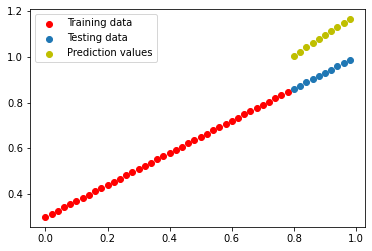

In [12]:
plot_predictions(predictions=y_pred)

In [22]:
#Setup a loss function
loss_fn = nn.MSELoss()
#Set up the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

## Training and Testing Model

In [49]:
# Setup empty lists to keep track of model progress
epochs_count = []
train_loss_values = []
test_loss_values = []

epochs = 1000
# Pass the data through the model for a number of epochs
for epoch in range(epochs):
    
    # Training
    model_0.train()
    
    # 1.Forward
    train_pred = model_0(X_train)
    
    #2. Calculate loss
    loss = loss_fn(y_train, train_pred)
    
    #3. Zero the gradients of the optimizer 
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss
    loss.backward()
    optimizer.step()
    
    #Evaluate
    model_0.eval()
    
    #Testing
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(y_test.type(torch.float), test_pred)
        
        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MSE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MSE Train Loss: 4.5432119177846175e-10 | MAE Test Loss: 1.7455714651504195e-09 
Epoch: 10 | MSE Train Loss: 4.203997983065477e-10 | MAE Test Loss: 1.6153404169827468e-09 
Epoch: 20 | MSE Train Loss: 3.8795996970542035e-10 | MAE Test Loss: 1.489723899794626e-09 
Epoch: 30 | MSE Train Loss: 3.56843610216373e-10 | MAE Test Loss: 1.3686871636053866e-09 
Epoch: 40 | MSE Train Loss: 3.266203696394854e-10 | MAE Test Loss: 1.2540741778366282e-09 
Epoch: 50 | MSE Train Loss: 2.9795643730068377e-10 | MAE Test Loss: 1.1428632484822288e-09 
Epoch: 60 | MSE Train Loss: 2.706801172092099e-10 | MAE Test Loss: 1.0379685999595267e-09 
Epoch: 70 | MSE Train Loss: 2.5242502532663025e-10 | MAE Test Loss: 9.70218794194011e-10 
Epoch: 80 | MSE Train Loss: 2.354214601041349e-10 | MAE Test Loss: 9.058329086819583e-10 
Epoch: 90 | MSE Train Loss: 2.1895134316718412e-10 | MAE Test Loss: 8.422763042581494e-10 
Epoch: 100 | MSE Train Loss: 2.03535521769993e-10 | MAE Test Loss: 7.820545877557095e-10 
Ep

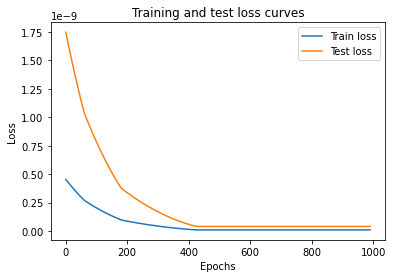

In [50]:
# Plot the loss curves
plt.plot(epochs_count, train_loss_values, label="Train loss")
plt.plot(epochs_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [51]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.9150]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Prediction 

In [52]:
model_0.eval()
with torch.inference_mode():
    test_pred = model_0(X_test)

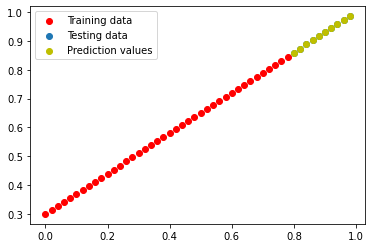

In [53]:
# Plot prediction
plot_predictions(predictions=test_pred)

In [54]:
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path('Parameter')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = 'parameter_linear_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: Parameter\parameter_linear_model.pth


# Loading Model

In [55]:
load_model = LinearRegression()
load_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

## Prediction with loading model

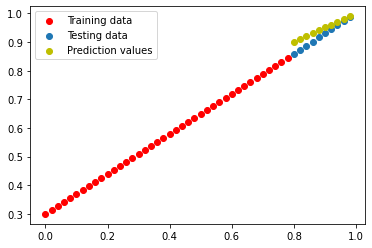

In [56]:
load_model.eval()
with torch.inference_mode():
    load_pred = load_model(y_test)
plot_predictions(predictions=load_pred)

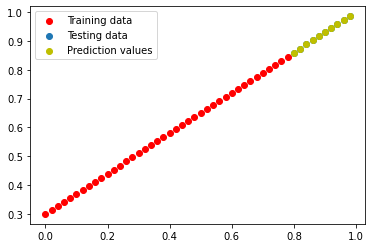

In [57]:
plot_predictions(predictions=test_pred)

In [58]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.9150]))])

In [59]:
load_model.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.9150]))])

In [60]:
test_pred - load_pred

tensor([[-0.0420],
        [-0.0378],
        [-0.0336],
        [-0.0294],
        [-0.0252],
        [-0.0210],
        [-0.0168],
        [-0.0126],
        [-0.0084],
        [-0.0042]])